## Python Programming for Medical Imaging

#### OS 


In [4]:
# To create a directory
import os
# os.makedirs('path')

In [5]:
os.makedirs("files_for_med")

In [6]:
# to prevent an error if the folder already exists
if not os.path.exists("file_for_med"):
    os.makedirs("file_for_med")

In [8]:
# another method for the same thing
os.makedirs("files_for_med", exist_ok=True)

In [9]:
# To join paths
path1 = 'a/b/c'
path2 = 'c/d/e/f'
os.path.join(path1, path2)

'a/b/c\\c/d/e/f'

In [10]:
os.path.join("i", "j")

'i\\j'

In [11]:
# Assuming you have a file and you want to extract the final part of the path
path3 = r"C:\Users\User\Downloads\Python for Medical Imaging Course.mp4"
print(os.path.basename(path3))

Python for Medical Imaging Course.mp4


#### Glob

Used to return everything inside a folder. It returns paths to what you have in the folder
* pip install glob2

In [14]:
from glob import glob

In [17]:
if not os.path.exists("files_for_med/folder1"):
    os.makedirs("files_for_med/folder1")
os.makedirs("files_for_med/folder2")
os.makedirs("files_for_med/folder3")

In [20]:
several_paths = glob("files_for_med/*")
several_paths

['files_for_med\\folder1', 'files_for_med\\folder2', 'files_for_med\\folder3']

In [21]:
another_paths = glob("files_for_med/*.txt")
another_paths

[]

#### NumPy


To rotate an image or array, you can apply transpose. Or you can rotate it by 90degrees

In [30]:
a = np.arange(0, 40, 2).reshape((4,5))
a

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28],
       [30, 32, 34, 36, 38]])

In [31]:
b = np.transpose(a)
b

array([[ 0, 10, 20, 30],
       [ 2, 12, 22, 32],
       [ 4, 14, 24, 34],
       [ 6, 16, 26, 36],
       [ 8, 18, 28, 38]])

In [33]:
c = np.rot90(a)
c

array([[ 8, 18, 28, 38],
       [ 6, 16, 26, 36],
       [ 4, 14, 24, 34],
       [ 2, 12, 22, 32],
       [ 0, 10, 20, 30]])

#### Matplotlib

When you use matplotlib for visualizing images, we read the image first then show it.

In [34]:
import matplotlib.pyplot as plt


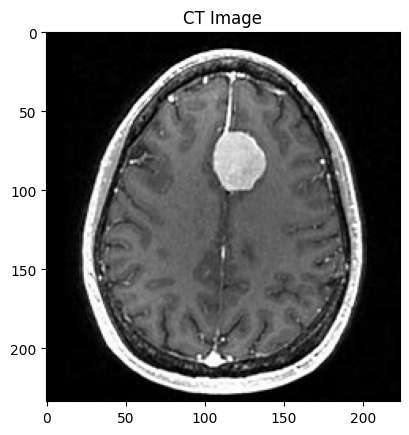

In [37]:
image1 = plt.imread(r"C:\Users\User\Documents\Med Files\OIP (1).jpeg")
plt.imshow(image1, cmap = "gray")
plt.title("CT Image")
plt.show()

In order to visualize 3d images, we have to specify hte x, y and slice.
For instance, 
image_3d = []
plt.imshow(image_3d[:,:,0,], cmap = 'gray')

To read 3 images at once

In [ ]:
img1 = plt.imread(r"C:\Users\User\Documents\Med Files\OIP (1).jpeg", cmap = 'gray)
img2 = plt.imread(r"C:\Users\User\Documents\Med Files\OIP.jpeg", cmap = 'gray)
img3 = plt.imread(r"C:\Users\User\Documents\Med Files\image_3.jpeg", cmap = 'gray)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize= (10,5))
axes[0].imshow(img1, cmap = "gray")
axes[0].set_title("Image 1")
axes[1].imshow(img2, cmap = "gray")
axes[1].set_title("Image 2")
axes[2].imshow(img3, cmap = "gray")
axes[2].set_title("Image 3")
plt.show()

#### OpenCv

pip install opencv-python
* import cv2
* img = cv2.imread(r"C:\Users\User\Documents\Med Files\image_3.jpeg", cv2.IMREAD_GRAYSCALE)
* cv2.imshow("Medical Image", img)
* cv2.waitKey(0)
* cv2.destroyAllWindows

To resize an image with cv2
resized_image = cv2.resize(img, (500,500))
cv2.imshow("Resized Image", resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows

To apply thresholding using cv2: Thresholding allows us take a particular part of the pixels. It allows us take the foreground especially different from the background
* threshold_image = cv2.threshold(img, 127, 255)[1]
* OR
* retval, threshold_image = cv2.threshold(img, 127, 255)[1]
* cv2.imshow("Resized Image", threshold_image)
* cv2.waitKey(0)
* cv2.destroyAllWindows


### Special Libraries for Medical Imaging

#### Pydicom
* pip install pydicom
* Helps in handling dicom files. Note that dicom files contain lots of info (metadata). The image has to be extracted by getting the image array
* import pydicom
* img_file = pydicom.dcmread("filepath")
* image = img_file.pixel_array
* The image can be visualized using Matplotlib
* plt.imshow(image, cmap="gray")
* plt.title("Medical Image")
* plt.show()

* To extract vany data from the metadata, simply use dot notation
* print(img_file.PatientID)
* You can also reassign and change data in the metadata
* img_file.PatientName = "Stanley OK"

We can also use pydicom to apply windowing to dicom files. It helps in adjusting contrast and brighhtness of an image for better visualization.
* win_image = image + img_file.RescaleSlope + img_file.RescaleIntercept
* win_image = np.clip(win_image, -200, 200)

To save the image using NumPy:
* np.save(path_to_file/win_image.npy)
* The image can then be viewed using matplotlib

#### Nibabel

Helps in handling nifti files. We first load the file then we get the fdata in order to extract the image
* pip install nibabel
* import nibabel as nib
* img = nib.load("path_to_file")
* img_array = img.get_fdata()
Now that we are dealing with a 3d image, we specify the x, y and the slice
plt.imshow(img_array[:,:,0], cmap="gray")

* To extract tags from the metadata
* print(f"Data Shape: {img.shape})
* print(f"Voxel Dimension: {img.header["pixdim"]})
* The header returns a dictionary.
* print(f"Data type: {img_array.dtype})

We can also apply transformation to the nifti file. Before saving thhe document, we need to add the affine matrix which helps to define how voxel coordinates in the image relate to real-world coordinates. It helps in spatial orientation, positioning, accurate measurements, etc.
When the affine matrix is not known, a 4*4 eye matrix is used. 
* You multiply the voxel coordinates by the affine matrix
* affine = np.eye(4)
* img.set_qform(affine)
You can use nibabel to save the file
nib.save(img, "path_to_save")

#### Dicom2nifti


Enables us convert dicom files to nifti files. It takes the paths to the input folder and output folder as arguments. It converts allthe dicom files in a folder to nifti files
pip install dicom2nifti
import dicom2nifti
dicom2nifti.dicom_series_to_nifti("path_to_input_folder", "path_to_output_folder")

#### SimpleITK

You can do anything in medical imaging using SimpleITK. Smoothing, Applying noise, converting files, reading files
* pip install SimpleITK
* import SimpleITK as sitk
* img = sitk.ReadImage("path_to_image")
* img_arr = GetArrayFromImage(img)
You can read the image by taking the first element return in img_arr[0]
* To extract from the metadata, you have to use GetMetaData and input the number tag as a str.
* print(f"PatientID: {img.GetMetaData("0010|0020")})

#### Numpy-stl


Especially for 3d printing, use the stl format. It works with the NumPy array and can also convert nifti to stl
* pip install numpy-stl
* import stl
* import nibabel as nib
* img = nib.load("path_to_image)
* img_arr = img.get_fdata()
* from stl import mesh
* from skimage import measure
* verts, faces, normals, values = measure.marching_cubes(img_arr, 0)
* img_3d = mesh.Mesh(np.zeros(faces.shape[0], dtype = mesh.Mesh.dtype))
* for i,f in enumerate(faces):
*     img_3d.vectors[i] = verts[f]
To save the file:
* img_3d.save("path/file.stl")

#### ITK 

Just like SimpleITK, this can also be used to do a lot in medical imaging. 
* pip install itk
* import itk
* img = itk.imread("path_to_file_eg_nifti")
* img_array = sitk.array_view_from_image(img)
* plt.imshow(img_array[0], cmap="gray") .........
To perform smoothing using SimpleITK
* smooth_image = itk.median_image_filter(img_array, radius=9)
To save the image:
itk.imwrite(smooth_image, "path_to_save")

#### MONAI

To crop foreground 
* from monai.transforms import CropForeground
* image = nib.load("path_to_nifti").get_fdata()
* cropper = CropForeground(margin=1, channel_indices=2, return_coords=True)
* cropped_image = cropper(image)
You can view cropped_image using matplotlib


To change image orientation
* from monai.transforms import Orientation
* image = nib.load("path_to_nifti").get_fdata()
* orientation_change = Orientation(axcodes = "RAS")
* new_image = orientation_change(image)

Medical image values range from -3000 to 3000. For deep learning models, we need to normalize our values between 0 and 1
 * from monai.transforms import ScaleIntensity
 * intensity_scaler = ScaleIntensity(minv = 0, maxv = 1)
 * image = nib.load("path_to_nifti").get_fdata()
 * scaled_image = intensity_scaler(image)
You can check the new min and max values using np.min, np.max

To normalize the data to be between 0 and 1, and also apply better contrast and brightness
* To get better visual, alter the a_min and a_max just like you set for np.clip earlier.
* b_min and b_max take values for normalization
from monai.transforms import ScaleIntensityRange
range_intensity_scale = ScaleIntensityRange(a_min = -200, a_max = 200, b_min = 0, b_max = 1)
image = nib.load("path_to_nifti").get_fdata()
new_image = range_intensity_scale(image)

Data Augmentation

** Random Gaussian Noise
* from monai.transforms import GaussianSmooth
* gaussian_smooth = GaussianSmooth(sigma=3)
* image = nib.load("path_to_nifti").get_fdata()
* smooth_image = gaussian_smooth(image)
* You can visualize the image using matplotlib

** Random Rotation 
Some functions in monai require four inputs for the axes, [0,:,:,:]. You can also specify this using numpy
* array = image[np.newaxis,:,:]
* rotator = RandRotate(prob=0.9, range_z = 0.6)  90% of the time, the rotate occurs
* The rotation is applied on the z axes, so we have range_z

* from monai.transforms import RandRotate
* array = image[np.newaxis,:,:]
* rotator = RandRotate(prob=0.9, range_z = 0.5)
* rotated_image = rotator(array)
* The image is viewed as a 4d

RandCoarseDropout

This deactivates some neurons but the model still has to find a solution despite this. You can also deactivate some parts from the image.
* spatial_size gives hole size, fill_value determines intensity of holes. SInce our values of image range from -3000 to 3000, 0 will not be black. It also takes a 4d

* from monai.transforms import RandCoarseDropout
* add_dropout = RandCoarseDropout(prob=1, holes=200,spartial_size=30, fill_value=-3000) 
* edited_volume = add_dropout(array)
* show_slice_4d(edited_volume, 30) 

You can also crop your image in the center or randomly 
* from monai.transforms import CenterSpatialCrop
